<a href="https://colab.research.google.com/github/alexdel1/TestPresentation/blob/main/testmodule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Parse the CSV data
csv_data = r"""source,target,label,style
éq. déc.,déc.,3.1.23
éq. irr.,irr.,3.1.24
éq. comp. réd.,comp. réd.,3.1.25
unit.,irr.,3.2.3,dashed
éq. unit.,éq. irr.,éq. 3.2.3,dashed
unit.,déc.,3.2.3,dashed
éq. unit.,éq. déc.,éq. 3.2.3,dashed
fini,éq. unit.,3.2.4
fini,irr.,3.2.5,dashed
fini,déc.,3.2.5,dashed
irr.,indéc.,3.2.7 pas la réciproque
fini,comp. réd.,3.2.8 Maschke
$\phi \nsim \rho$,$\frac{\gamma}{x^2}$,test
"""

In [4]:
!sudo apt update
!sudo apt install graphviz libgraphviz-dev
#ne pas oublier la version dev de graphviz

!pip install pygraphviz

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
57 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InR

In [23]:
import pandas as pd
import io
import unicodedata
import re
import networkx as nx
import pygraphviz # Import the Graph class
from networkx.drawing.nx_pydot import to_pydot
from IPython.display import SVG

In [8]:

# Function to convert text to a valid Python variable name
def to_variable_name(text):
    # Normalize the text to decompose accented characters
    text = unicodedata.normalize('NFKD', str(text))

    # Remove non-ASCII characters and replace with their base letters
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Remove remaining special characters and replace spaces with underscores
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace(' ', '_')

    return text

def csv_to_pd(A):
# Create DataFrame A
A = pd.read_csv(io.StringIO(csv_data))

# Create DataFrame B with distinct elements from first two columns
B_data = pd.concat([A['source'], A['target']]).drop_duplicates()
B = pd.DataFrame({
    'texlbl': B_data,
    'name': B_data.apply(to_variable_name)
})

# Create DataFrame C
C = pd.DataFrame({
    'source_name': A['source'].apply(to_variable_name),
    'target_name': A['target'].apply(to_variable_name),
    'label': A['label'],
    'style': A.iloc[:, 3]
})

C.fillna("solid", inplace=True)

print("DataFrame A:")
print(A)
print("\nDataFrame B:")
print(B)
print("\nDataFrame C:")
print(C)

DataFrame A:
               source                target                    label   style
0            éq. déc.                  déc.                   3.1.23     NaN
1            éq. irr.                  irr.                   3.1.24     NaN
2      éq. comp. réd.            comp. réd.                   3.1.25     NaN
3               unit.                  irr.                    3.2.3  dashed
4           éq. unit.              éq. irr.                éq. 3.2.3  dashed
5               unit.                  déc.                    3.2.3  dashed
6           éq. unit.              éq. déc.                éq. 3.2.3  dashed
7                fini             éq. unit.                    3.2.4     NaN
8                fini                  irr.                    3.2.5  dashed
9                fini                  déc.                    3.2.5  dashed
10               irr.                indéc.  3.2.7 pas la réciproque     NaN
11               fini            comp. réd.            3.2.8 Ma

In [9]:


# Assuming B and C DataFrames are already created from the previous code

# Create an empty graph
G = nx.DiGraph()  # Using DiGraph for a directed graph

# Add nodes from table B
# Use the 'name' column as node identifier and 'texlbl' as a node attribute
for _, row in B.iterrows():
    G.add_node(
        row['name'],  # Use the converted variable name as node identifier
        texlbl=row['texlbl']  # Original label as a node attribute
    )

# Add edges from table C
for _, row in C.iterrows():
    # Add an edge using the converted source and target names
    G.add_edge(
        row['source_name'],  # Source node
        row['target_name'],  # Target node
        style=row.get('style', ''),  # Style attribute
        texlbl=row.get('label', '')  # Label attribute
    )

# Optional: Verify the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Optional: Print node and edge details
print("\nNodes:")
for node in G.nodes(data=True):
    print(node)

print("\nEdges:")
for edge in G.edges(data=True):
    print(edge)

Number of nodes: 12
Number of edges: 13

Nodes:
('eq_dec', {'texlbl': 'éq. déc.'})
('eq_irr', {'texlbl': 'éq. irr.'})
('eq_comp_red', {'texlbl': 'éq. comp. réd.'})
('unit', {'texlbl': 'unit.'})
('eq_unit', {'texlbl': 'éq. unit.'})
('fini', {'texlbl': 'fini'})
('irr', {'texlbl': 'irr.'})
('phi_nsim_rho', {'texlbl': '$\\phi \\nsim \\rho$'})
('dec', {'texlbl': 'déc.'})
('comp_red', {'texlbl': 'comp. réd.'})
('indec', {'texlbl': 'indéc.'})
('fracgammax2', {'texlbl': '$\\frac{\\gamma}{x^2}$'})

Edges:
('eq_dec', 'dec', {'style': 'solid', 'texlbl': '3.1.23'})
('eq_irr', 'irr', {'style': 'solid', 'texlbl': '3.1.24'})
('eq_comp_red', 'comp_red', {'style': 'solid', 'texlbl': '3.1.25'})
('unit', 'irr', {'style': 'dashed', 'texlbl': '3.2.3'})
('unit', 'dec', {'style': 'dashed', 'texlbl': '3.2.3'})
('eq_unit', 'eq_irr', {'style': 'dashed', 'texlbl': 'éq. 3.2.3'})
('eq_unit', 'eq_dec', {'style': 'dashed', 'texlbl': 'éq. 3.2.3'})
('fini', 'eq_unit', {'style': 'solid', 'texlbl': '3.2.4'})
('fini', 'i

In [16]:
# Convertir le graphe en pygraphviz AGraph
A = to_agraph(G)

# Personnaliser le style
A.graph_attr.update(rankdir="LR")  # Orientation de gauche à droite
A.node_attr.update(fontsize="10", style="filled")
A.edge_attr.update(color="black", arrowsize="0.5")
A.graph_attr.update(encoding="utf-8")

# Écrire directement dans un fichier DOT
A.write("graph.dot")

dot_graph = to_pydot(G)

# Save the DOT file
with open("graph.dot", "w", encoding="utf-8") as f:
    f.write(dot_graph.to_string())

print(dot_graph.to_string())



# Écrire directement dans un fichier DOT
#A.write("graph.dot")



# Method 3: Using read().splitlines()
with open('graph.dot', 'r') as file:
    lines = file.read().splitlines()
    for line in lines:
        print(line)
# Method 3: Using read().splitlines()
with open('graph.dot', 'r') as file:
    lines = file.read().splitlines()
    for line in lines:
        print(line)

strict digraph {
eq_dec [texlbl="éq. déc."];
eq_irr [texlbl="éq. irr."];
eq_comp_red [texlbl="éq. comp. réd."];
unit [texlbl="unit."];
eq_unit [texlbl="éq. unit."];
fini [texlbl=fini];
irr [texlbl="irr."];
phi_nsim_rho [texlbl="$\phi \nsim \rho$"];
dec [texlbl="déc."];
comp_red [texlbl="comp. réd."];
indec [texlbl="indéc."];
fracgammax2 [texlbl="$\frac{\gamma}{x^2}$"];
eq_dec -> dec [style=solid, texlbl=3.1.23];
eq_irr -> irr [style=solid, texlbl=3.1.24];
eq_comp_red -> comp_red [style=solid, texlbl=3.1.25];
unit -> irr [style=dashed, texlbl=3.2.3];
unit -> dec [style=dashed, texlbl=3.2.3];
eq_unit -> eq_irr [style=dashed, texlbl="éq. 3.2.3"];
eq_unit -> eq_dec [style=dashed, texlbl="éq. 3.2.3"];
fini -> eq_unit [style=solid, texlbl=3.2.4];
fini -> irr [style=dashed, texlbl=3.2.5];
fini -> dec [style=dashed, texlbl=3.2.5];
fini -> comp_red [style=solid, texlbl="3.2.8 Maschke"];
irr -> indec [style=solid, texlbl="3.2.7 pas la réciproque"];
phi_nsim_rho -> fracgammax2 [style=solid, texlb

In [12]:
!pip install dot2tex

In [18]:
!sudo apt install pdf2svg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpoppler-glib8
The following NEW packages will be installed:
  libpoppler-glib8 pdf2svg
0 upgraded, 2 newly installed, 0 to remove and 57 not upgraded.
Need to get 140 kB of archives.
After this operation, 514 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libpoppler-glib8 amd64 22.02.0-2ubuntu0.5 [134 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 pdf2svg amd64 0.2.3-2 [6,888 B]
Fetched 140 kB in 1s (262 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling t

In [19]:
!sudo apt update
!sudo apt install texlive-xetex

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
57 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InR

In [20]:

!dot2tex  --docpreamble "\usepackage[utf8]{inputenc} \usepackage[T1]{fontenc} \usepackage{amssymb}" -tmath --autosize graph.dot > graph.tex
#!latex

In [22]:
def insert_resizebox(tex_file_path):
    """Inserts \resizebox{\linewidth}{!}{ and } into a LaTeX file.

    Args:
        tex_file_path: Path to the LaTeX file.

    Returns:
        None
    """

    with open(tex_file_path, 'r') as f:
        lines = f.readlines()

    # Find the line containing \pagestyle{empty}
    for i, line in enumerate(lines):
        if r"\pagestyle{empty}" in line:
            lines.insert(i + 1, r"\resizebox{\linewidth}{!}{")
            break

    # Find the line containing \end{document}
    for i,line in enumerate(lines):
        if r"\end{document}" in line:
            lines.insert(i-1, r"}")
            break

    with open(tex_file_path, 'w') as f:
        f.writelines(lines)

# Example usage:
tex_file_path = "graph.tex"
insert_resizebox(tex_file_path)

This is XeTeX, Version 3.141592653-2.6-0.999993 (TeX Live 2022/dev/Debian) (preloaded format=xelatex)
 restricted \write18 enabled.
entering extended mode
(./graph.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-def/xetex.def)
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/svgnam.def)
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/x11nam.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty

Package inputenc Warning: inputenc package ignored with utf8 based engines.

) (/usr/share/texlive/texmf-dist/tex/latex/pgf/frontendlayer/tikz.sty
(/usr/share/texlive/texmf-dist/tex/latex/pgf/basiclayer/pg

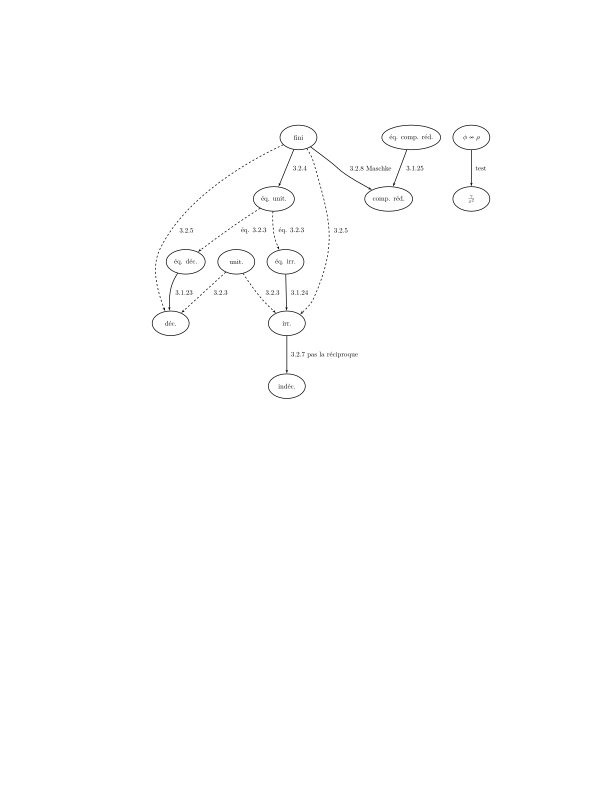

In [24]:

!xelatex graph.tex
!pdf2svg graph.pdf graph.svg

SVG("graph.svg")